# __<center>CUSTOMER SEGMENTATION WITH ONLINE RETAIL DATASET</center>__
<hr/>
<br/>

In [1]:
# All Tools needed for this project

# For data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# For clustering and segmentation
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
# Load and read the dataset into a dataframe

df = pd.read_excel(r"C:\Users\USER\Desktop\Portfolio\Datasets\Online_Retail.xlsx")

df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [3]:
# Understanding dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#### Data cleaning

In [4]:
# handling any missing values, duplicates, or inconsistencies.

df.drop_duplicates() # Get rid of duplicates

df.dropna(subset=['CustomerID'], inplace=True) # Drop rows with missing critical informatin

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']) # Convert to datetime

df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]   # Get rid of negetive values



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [6]:
# Descriptive statistic

df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397884.000000,397884,397884.000000,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,179.331775,NaN,22.097877,1713.141560


#### Exploratory Data Analysis

C:\Users\USER\AppData\Local\Temp\ipykernel_17792\528609286.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalSpend'] =  df['Quantity'] * df['UnitPrice'] # Total money spent on each transaction


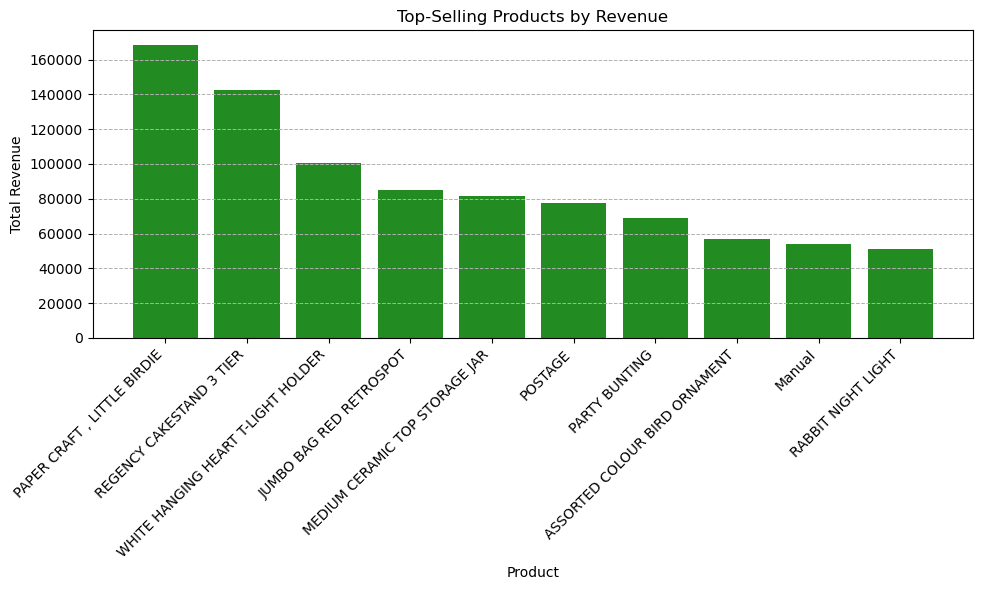

In [7]:
# Top products by revenue
df['TotalSpend'] =  df['Quantity'] * df['UnitPrice'] # Total money spent on each transaction

top_products = df.groupby('Description').agg({
    'TotalSpend': 'sum', 
    'Quantity': 'sum'
}).sort_values(by='TotalSpend', ascending=False).head(10).reset_index()

plt.figure(figsize=(10, 6))
plt.bar(top_products['Description'], top_products['TotalSpend'], color='forestgreen')
plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.title('Top-Selling Products by Revenue')
plt.xticks(rotation=45, ha='right')
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)   
plt.tight_layout()  
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_17792\4143053052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')


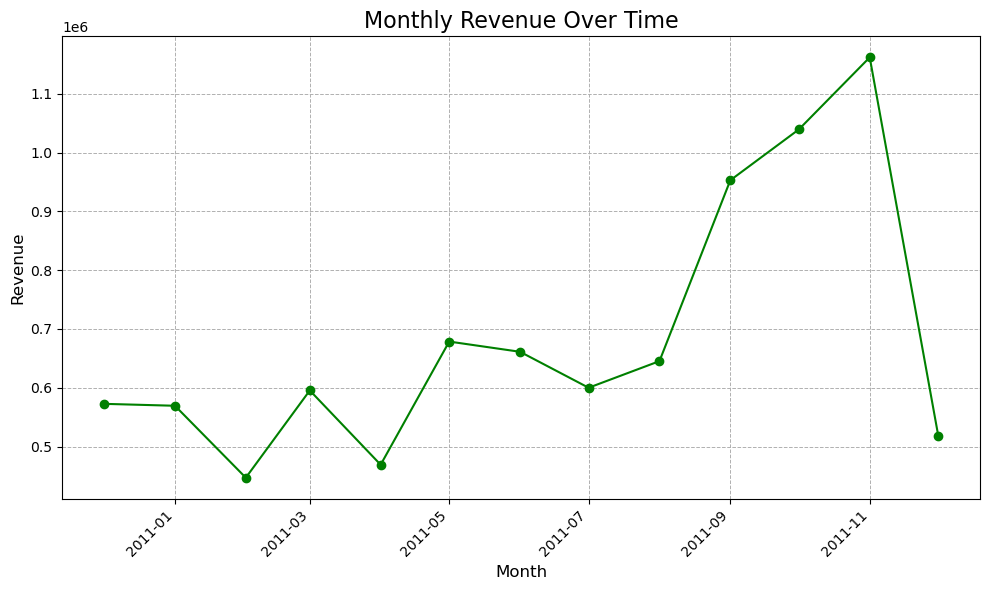

In [8]:
# Monthly revenue
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_revenue = df.groupby('InvoiceMonth')['TotalSpend'].sum().reset_index()
monthly_revenue['InvoiceMonth'] = monthly_revenue['InvoiceMonth'].dt.to_timestamp()

plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue['InvoiceMonth'], monthly_revenue['TotalSpend'], marker='o', color='g')

plt.title('Monthly Revenue Over Time', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.7) 
plt.tight_layout()  
plt.show()

#### Feature engineering and RFM analysis

In [9]:
# Create meaningful features from raw data, such as total purchase frequency, average purchase value, and recency

# Recency is the number of days since last purchase
# Frequency is number of times the made a purchase
# Monetary is the total money spent

# RFM Analysis
# R stands for recency, F stand for frequency, and M stand for monetary

latest_date = df['InvoiceDate'].max()
rfm = df.groupby('CustomerID').agg({
    'InvoiceNo': 'count',
    'InvoiceDate': lambda x: (latest_date - x.max()).days,
    'TotalSpend': 'sum'
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalSpend': 'Monetary'
    })
rfm.reset_index(inplace=True)


# Standardizing the features

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

#### Machine learning: Clustering

In [12]:
# Applying the K-Means clustering method to segment customers base on their purchasing behavior

kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

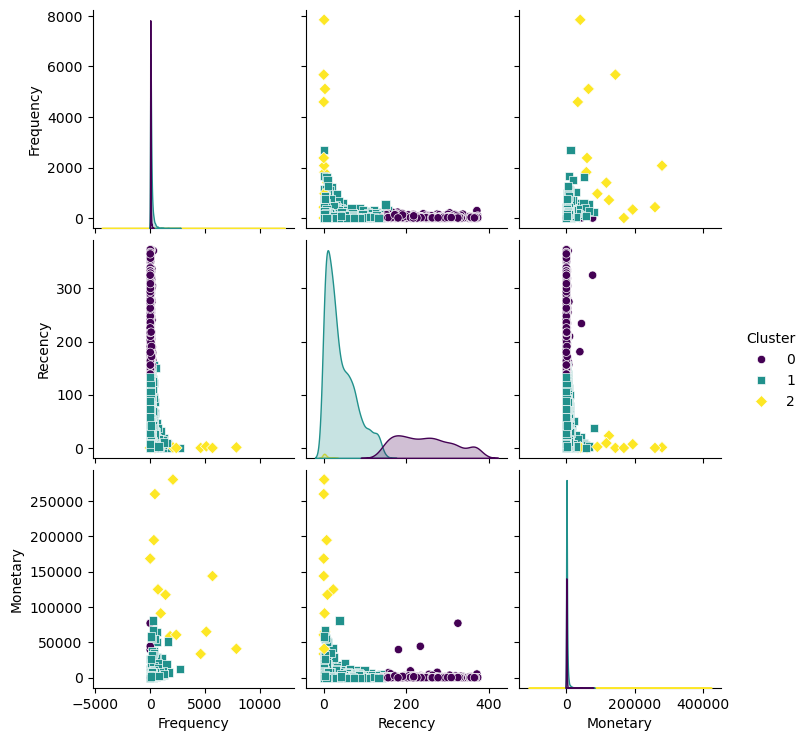

In [13]:
# Assess the quality of the clusters using visualization technique

plot_data = rfm.drop(columns=['CustomerID'])

sns.pairplot(plot_data, palette='viridis', hue='Cluster', markers=["o", "s", "D"])
plt.show()

In [14]:
# Aggregated cluster statistics

cluster_summary = plot_data.groupby('Cluster').mean().astype(int)
cluster_summary

,Frequency,Recency,Monetary
Cluster,,,
0,27,246,637
1,103,40,2028
2,2565,3,126118


<br/>
<br/>

#### __Insights__

- Cluster 0: Customers in this cluster-0 group has a low frequency of purchases or transactions (27), purchases relatively infrequently ( recency of 246 days), and spent a moderate amount of money ($637).

- Cluster 1: Customers in this cluster-1 has purchases or transactions more frequently (103), engages relatively recently (recency of 40), and spends a significant amount ($2,028)

- Cluster 2: Customers in this cluster-2 has a very high frequency of purchases or transactions (2565), engages very recently(recency of 3 days), and has spent a substantial amount ($126,118)


<br/>

#### __RECOMMENDATIONS__

- For customers in cluster-0, who appear to have lower engagement and spending with the business. To improve their activity, consider targeted re-engagement campaigns, special offers, or loyalty programs to boost their frequency and monetary value.

- For customers in cluster-1, who appear to are not the most frequent buyers but spend well and are relatively recent. increasing their engagement will be ideal by offering personalized product recommendations or exclusive deals to encourage repeat purchases.

- For customers in cluster-2, who appear to the most valuable high frequent and spending and puschased recently. it would be wise to reward them with VIP programs or personalize offers to maintain their loyalty and encourage them to continue their high-value behavior.

<br/>
<br/>
<hr/>

## <center><u> __Author__ </u></center>

<br/>

__GODSWILL SOTONYE JUMBO__
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; *Data Scientist* __|__ *Analyst*

</br>

godswill.j@outlook.com </br>
[LinkedIn Profile](https://www.linkedin.com/in/godswilljumbo) | [Github Profile](https://www.github.com/godswilljumbo) | [Portfolio](https://godswilljumbo.github.io)

*<center> 2024 &copy; Godswill Jumbo. All rights reserved. </center>*
<hr/>